# import libraries and trees

In [1]:
#pip install -U uproot
#pip install fpdf

In [1]:
import numpy as np
import uproot3 as uproot
import uproot3_methods as um
import collections
import matplotlib.pyplot as plt
# %matplotlib widget

from matplotlib.backends.backend_pdf import PdfPages
from itertools import chain

from datetime import datetime

name = "BmumuKst"
file_name = "./data/ntuple-300700_part_01.root"
tree_name = "BaseSelection_KStarMuMu_BmumuKstSelection"
max_events = 1_000
#max_events = -1 

#priklad: load_string = "/B_chi2_ndof|B_tau_MinA0|B_mass|B_trk1_pT|B_trk2_pT|B_trk1_charge|B_trk2_charge|B_trk1_eta|B_trk2_eta|B_trk1_phi|B_trk2_phi|B_mass_err|B_pT/" 
load_string ="/BmumuKst_+/"

print(name,max_events)

BmumuKst 1000


## load data

In [24]:
allCand = uproot.open(file_name)["Nominal/"+tree_name]


if max_events and max_events > 0:
    vtx =  allCand.arrays(load_string, outputtype = collections.namedtuple, entrystop = max_events,) 
else:
    vtx =  allCand.arrays(load_string, outputtype = collections.namedtuple)
    
print("data loaded",datetime.now().strftime("%d/%m/%Y - %H:%M:%S"))
print("shape:",np.shape(vtx))
print(vtx)



TypeError: TTreeMethods.arrays() got an unexpected keyword argument 'library'

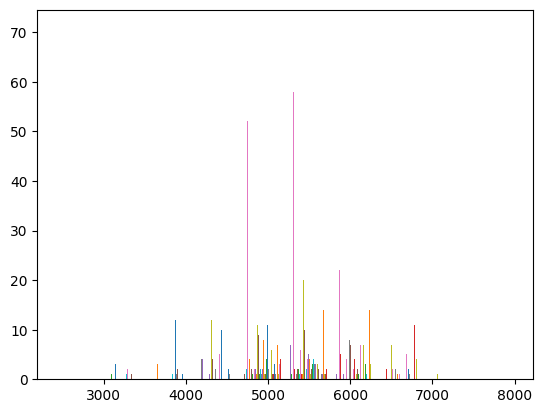

In [9]:
plt.hist(vtx.BmumuKst_B_mass)
plt.show()


## TODO plot data

In [23]:
# plt.hist(vtx.BmumuKst_B_mass)
# plt.show()
print(vtx["BmumuKst_B_mass"])

pole_poli = vtx.BmumuKst_B_mass
indexy = vtx.BmumuKst_B_mass>5000
print (pole_poli[indexy])
pole = np.concatenate( pole_poli, axis=0 )

print("pole_poli", len(pole_poli))
print(pole_poli)
print()
print("pole", len(pole))
print(pole)
kolko_kandidatov_v_jednom_evente = [len(event_pole) for event_pole in pole_poli]
print()
print(kolko_kandidatov_v_jednom_evente)

TypeError: tuple indices must be integers or slices, not str

## later TODO prepare cuts

In [ ]:
from Naming.cuts import cuts_run1, var


SyntaxError: invalid syntax. Perhaps you forgot a comma? (158197989.py, line 2)

In [15]:
applyCuts = True

if name == "Bd":
    massMin = 5000;
    massMax = 5650;

    tauMin = -2;
    tauMax = 20;

    tauErrMin = .018;
    tauErrMax = .12;

    massErrMin = 10;
    massErrMax = 100;

    ptMin = 10;
    ptMax = 100;
    muCut = 4000

elif name == "Bplus":
    massMin = 5000;
    massMax = 5600;

    tauMin = -2;
    tauMax = 30;

    tauErrMin = .018;
    tauErrMax = .165;

    massErrMin = 0;
    massErrMax = 100;

    ptMin = 0;
    ptMax = 100;
    muCut = 6000
    
if not useTriggers: 
    cuts = {}  
    newCuts = True
else: 
    cuts = {"trig" : trigs}
    newCuts = trigs
######if(year == "2017"){
newCuts = newCuts * (vtx.run_number>=324320) * (vtx.run_number < 341649)
cuts["run_number"] = newCuts
helpCut = (abs(vtx.B_mu1_eta)<=1.05) * (abs(vtx.B_mu2_eta)<=1.05 )  * ( vtx.B_Jpsi_mass<3229 ) *(vtx.B_Jpsi_mass>2959)
helpCut = helpCut |  ( abs(vtx.B_mu1_eta)>1.05) * (abs(vtx.B_mu1_eta)<=2.5) * (abs(vtx.B_mu2_eta)>1.05) * (abs(vtx.B_mu2_eta)<=2.5 ) * ( vtx.B_Jpsi_mass>2852 ) * ( vtx.B_Jpsi_mass<3332 ) 
helpCut2 = (abs(vtx.B_mu1_eta)<=1.05) * (abs(vtx.B_mu2_eta)>1.05) * (abs(vtx.B_mu2_eta)<=2.5) | (abs(vtx.B_mu1_eta)>1.05) * (abs(vtx.B_mu1_eta)<=2.5) * (abs(vtx.B_mu2_eta)<=1.05) 
helpCut2 = helpCut2 * (vtx.B_Jpsi_mass>2913) * (vtx.B_Jpsi_mass<3273)
helpCuts = helpCut | helpCut2
newCuts = newCuts * helpCuts
cuts["jpsi"] = newCuts
newCuts = newCuts * (vtx.B_tau_MinA0>tauMin)*(vtx.B_tau_MinA0<tauMax)
cuts["tau"] = newCuts
newCuts = newCuts * (vtx.B_tau_MinA0_err>tauErrMin)*(vtx.B_tau_MinA0_err<tauErrMax)
cuts["tau_err"] =  newCuts
newCuts = newCuts * (vtx.B_mass>massMin)*(vtx.B_mass<massMax)
cuts["mass"] =  newCuts
newCuts = newCuts * (vtx.B_mass_err>massErrMin)*(vtx.B_mass_err<massErrMax)
cuts["mass_err in "+str(massErrMin)+" , "+str(massErrMax)] =  newCuts
newCuts = newCuts * (vtx.B_mu1_pT>muCut)*(vtx.B_mu2_pT>muCut)
cuts["mu_pt > "+str(muCut)] =  newCuts
newCuts = newCuts * (vtx.pass_GRL)
cuts["good run list"] =  newCuts
newCuts = newCuts * (vtx.B_p
                     T>10000)
cuts["B_pt>10000"] =  newCuts
if name == "Bd":
    newCuts = newCuts * (vtx.B_trk1_pT>1400) 
    cuts["trk1_pt > 1400"] =  newCuts
    newCuts = newCuts * (vtx.B_trk2_pT>1000)
    cuts["trk2_pt > 1000"] =  newCuts
elif name == "Bplus":
    newCuts = newCuts * (vtx.B_chi2_ndof<3)
    cuts["chi2/ndof"] =  newCuts
    newCuts = newCuts * (vtx.B_trk1_pT>2500) 
    cuts["trk1_pt > 2500"] =  newCuts
    
finalCuts = newCuts

#############################pT cuts##########################################

if name == "Bd":
    pTcuts = [[1500,1000],[1700,1000],[2000,1000],[2300,1000],
         [1500,1200],[1700,1200],[2000,1200],[2300,1200],
         [1500,1500],[1700,1500],[2000,1500],[2300,1500]]
    
elif name == "Bplus":
    pTcuts = [[2500],[3000],[3500],[4000],]#[4500]]
    
for i,c in enumerate(pTcuts):
    
    newCuts = finalCuts * (vtx.B_trk1_pT>c[0]) 
    namePtCut = "pT(kaon) > " + str(c[0]) 
    if name == "Bd": 
        newCuts =  newCuts * (vtx.B_trk2_pT>c[1])
        namePtCut += " && pT(pion) > " + str(c[1])
    cuts[namePtCut] = newCuts
    
print("cuts prepared",datetime.now().strftime("%d/%m/%Y - %H:%M:%S"))
for c in cuts.keys():
    print(c)


NameError: name 'useTriggers' is not defined

## count number of candidates and find their position


In [10]:
from fpdf import FPDF

In [23]:
ccc = cuts['pT(kaon) > 2300 && pT(pion) > 1500']
chis = vtx.B_chi2_ndof[ccc]
chis=np.array(chis)
taus = vtx.B_tau_MinA0[ccc]
taus = np.array(taus)
masses = vtx.B_mass[ccc]
masses = np.array(masses)
tr1Pts = vtx.B_trk1_pT[ccc]
tr1Pts = np.array(tr1Pts)
if name == "Bd":
    tr2Pts = vtx.B_trk2_pT[ccc]
    tr2Pts = np.array(tr2Pts)

#print(len(vtx.evt_number),len(np.unique(vtx.evt_number)),len(vtx.B_chi2_ndof))
nCandidates = [len(chi) for chi in chis ]
nCandidates = np.array(nCandidates)
multipleCandidates = [nCand>1 for nCand in nCandidates ]
multipleCandidates = np.array(multipleCandidates)
singleCandidate = [not mc for mc in multipleCandidates]
singleCandidate = np.array(singleCandidate)
nEvents = np.sum((nCandidates>=1))

print(nEvents,np.sum(nCandidates),np.sum(multipleCandidates),np.sum(singleCandidate))

948499 1017940 54554 4152558


In [24]:
print(nEvents,np.sum(nCandidates),np.sum(multipleCandidates),np.sum(singleCandidate),np.sum(multipleCandidates)+np.sum(singleCandidate))
#print(min(masses),max(masses))

948499 1017940 54554 4152558 4207112


<ipython-input-24-8d226037d7fa>:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  print(min(masses),max(masses))


ValueError: operands could not be broadcast together with shapes (3,) (0,) 

In [14]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Times", 'B', size = 15)
  
# create a cell
pdf.cell(200, 10, txt = name + ' 2017 old ', 
         ln = 1, align = 'C')

pdf.set_font("Times", size = 12)
pdf.set_text_color(200,200,200);

# add another cell
pdf.cell(200, 8, txt = file_name,
         ln = 2, align = 'C')
pdf.cell(200, 6, txt = "Marek Biros",
         ln = 3, align = 'C')
  
# save the pdf with name .pdf
pdf.set_text_color(0,0,0);

pdf.set_font("Times", 'BU', size = 12)
line = 5
pdf.cell(200, 8, txt = "cutFlow",
         ln = line, align = 'C')
line += 2

print('\033[1m' + name + ' 2017  \033[0m')

pdf.set_font("Times",'B', size = 10)
pdf.cell(200, 6, txt = "no selection", 
         ln = line, align = 'L')
line += 1
pdf.set_font("Times", size = 10)
pdf.cell(200, 5, txt = "nEvents: "+str(nEvents), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/len(vtx.evt_number))+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEvents), 
         ln = line, align = 'L')
line += 2

pdf.line(10, 65, 200, 65)
pdf.cell(200, 3, txt = "", 
         ln = line, align = 'L')

print("nEvents",nEvents,len(vtx.evt_number))
print("nEventsWithMultipleCandidates:",np.sum(multipleCandidates),"nEventsWithSingleCandidate:",np.sum(singleCandidate), "nCandidates:", np.sum(nCandidates))
print('{:2.2%}'.format(np.sum(multipleCandidates)/nEvents),"events have multiple candidates",'{:0.2f}'.format(np.sum(nCandidates)/nEvents))
print()

nEventsAfterCut =0

survived = []
survivedMultCands = []
meanMultCand = []
for i, c in enumerate(cuts):
    newCuts = cuts[c]
    chis = vtx.B_chi2_ndof[newCuts] if applyCuts else vtx.B_chi2_ndof
    chis=np.array(chis)
    #taus = vtx.B_tau_MinA0[newCuts]  if applyCuts else vtx.B_tau_MinA0
    #taus = np.array(taus)
    #masses = vtx.B_mass[newCuts]  if applyCuts else vtx.B_mass
    #masses = np.array(masses)
    #tr1Pts = vtx.B_trk1_pT[newCuts]  if applyCuts else vtx.B_trk1_pT
    #tr1Pts = np.array(tr1Pts)
    #tr2Pts = vtx.B_trk2_pT[newCuts]
    #tr2Pts = np.array(tr2Pts)

    #print(len(vtx.evt_number),len(np.unique(vtx.evt_number)),len(vtx.B_chi2_ndof))
    nCandidates = [len(chi) for chi in chis ]
    nCandidates = np.array(nCandidates)
    multipleCandidates = [nCand>1 for nCand in nCandidates ]
    multipleCandidates = np.array(multipleCandidates)
    singleCandidate = [nCand==1 for nCand in nCandidates ]
    singleCandidate = np.array(singleCandidate)
    print('\033[1m' + c + '\033[0m')
    nEventsAfterCut = np.sum((nCandidates>=1))
    eventSurvival = nEventsAfterCut/nEvents
    evtsWithMultCand = np.sum(multipleCandidates)/nEventsAfterCut
    meanNCandInMultCand = np.sum(nCandidates[nCandidates>1])/np.sum(multipleCandidates)
    survivedMultCands.append(evtsWithMultCand)
    meanMultCand.append(meanNCandInMultCand)
    print("nEventsAfterCut:",nEventsAfterCut,'nEventsAfterCut/nEvents: {:2.2%}'.format(eventSurvival),)
    print("nEventsWithMultipleCandidates:",np.sum(multipleCandidates),"nEventsWithSingleCandidate:",np.sum(singleCandidate), "nCandidates:", np.sum(nCandidates))
    print('{:2.2%}'.format(evtsWithMultCand),"events have multiple candidates;",'mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEventsAfterCut), "; mean(nCandidatesPerEvent): {:0.2f}".format(meanNCandInMultCand))
    print()
    
    pdf.set_font("Times",'B', size = 10)
    pdf.cell(200, 6, txt = str(c), 
         ln = line, align = 'L')
    line += 1
    pdf.set_font("Times", size = 10)
    pdf.cell(200, 5, txt = "nEventsAfterCut: "+str(nEventsAfterCut)+'; nEventsAfterCut/nEvents: {:2.2%}'.format(eventSurvival), 
         ln = line, align = 'L')
    line += 1
    pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
             ln = line, align = 'L')
    line += 1
    pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/nEventsAfterCut)+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEventsAfterCut) + "; mean(nCandidatesPerEvent): {:0.2f}".format(meanNCandInMultCand) , ln = line, align = 'L')
    line += 2
    survived.append(eventSurvival)

Bd 2017  
nEvents 8566126 8566126
nEventsWithMultipleCandidates: 1781776 nEventsWithSingleCandidate: 6784350 nCandidates: 11264612
20.80% events have multiple candidates 1.32

trig
nEventsAfterCut: 6983318 nEventsAfterCut/nEvents: 81.52%
nEventsWithMultipleCandidates: 1330019 nEventsWithSingleCandidate: 5653299 nCandidates: 8926409
19.05% events have multiple candidates; mean(nCandidatesPerEvent): 1.28 ; mean(nCandidatesPerEvent): 2.46

run_number
nEventsAfterCut: 6983318 nEventsAfterCut/nEvents: 81.52%
nEventsWithMultipleCandidates: 1330019 nEventsWithSingleCandidate: 5653299 nCandidates: 8926409
19.05% events have multiple candidates; mean(nCandidatesPerEvent): 1.28 ; mean(nCandidatesPerEvent): 2.46

jpsi
nEventsAfterCut: 6939301 nEventsAfterCut/nEvents: 81.01%
nEventsWithMultipleCandidates: 1322483 nEventsWithSingleCandidate: 5616818 nCandidates: 8870985
19.06% events have multiple candidates; mean(nCandidatesPerEvent): 1.28 ; mean(nCandidatesPerEvent): 2.46

tau
nEventsAfterCut: 69

In [65]:
print(newCuts[:100])
print(vtx.B_chi2_ndof[newCuts ][:100])
print(multipleCandidates[:100])
print(len(vtx.B_chi2_ndof))
print(len(vtx.B_chi2_ndof[multipleCandidates]))
print(vtx.B_chi2_ndof[newCuts][multipleCandidates][:100])
multipleChis=vtx.B_chi2_ndof[newCuts][multipleCandidates]
a=[np.argmin(ch)  for ch in multipleChis]
b=[ch[a[i]]  for i,ch in enumerate(multipleChis)]
print(a[:10])
print(b[:10])

[[False] [False] [False] ... [True False] [True] [False]]
[[] [] [] ... [1.5205464] [1.1015977] []]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
4207112
54554
[[2.2836854 1.6008948 1.35151] [1.0879232 0.8871531] [1.1815917 1.0948616] ... [0.3649191 1.4677523] [0.43439028 0.7951656] [1.4222578 0.61095005]]
[2, 1, 1, 5, 0, 1, 1, 0, 0, 1]
[1.35151, 0.8871531, 1.0948616, 1.4515234, 0.78702927, 1.5402116, 1.4634506, 2.6432407, 0.4294367

## Effect of selection after cuts on multipleCuts

In [49]:
if name == "Bd":
    pTcuts = [[1000,500],[1400,1000],[1500,1200],[1700,1200],[1700,1500],[2500,1700]]
    
elif name == "Bplus":
    pTcuts = [[2500],[3000],[3500],[4000],]#[4500]]

cuts = {}    
finalCuts = True
for i,c in enumerate(pTcuts):
    
    newCuts =  (vtx.B_trk1_pT>c[0]) 
    namePtCut = "_" + str(c[0]) 
    if name == "Bd": 
        newCuts =  newCuts * (vtx.B_trk2_pT>c[1])
        namePtCut += "_" + str(c[1])
    cuts[namePtCut] = newCuts
    
print("cuts prepared",datetime.now().strftime("%d/%m/%Y - %H:%M:%S"))
for c in cuts.keys():
    print(c)

cuts prepared 15/10/2021 - 18:24:26
_1000_500
_1400_1000
_1500_1200
_1700_1200
_1700_1500
_2500_1700


In [83]:
#priprav limity a zgrup data aby sa plotovalo v slucke    
Xlims = {"Chi2/ndf" : [[0,2.5]], 
         "Lifetime" : [[-2,15],[-0.5,1],],
         "B_mass" : [[5000,5650]],
         "B_trk1_pT" : [[1000,10000]],
         "B_trk2_pT" : [[500,10000]]
        }
plotLinearLog ={"Chi2/ndf" : [[True,False]], 
             "Lifetime" : [[False,True],[True,True]],
             "B_mass" : [[True,False]],
             "B_trk1_pT" : [[True,True]],
             "B_trk2_pT" : [[True,True]]
        }

formatString ={"Chi2/ndf" : '{:0.2f}', 
             "Lifetime" : '{:0.4f}',
             "B_mass" : '{:0.1f}',
             "B_trk1_pT" : '{:0.1f}',
             "B_trk2_pT" : '{:0.1f}'
        }

results = {}
yieldsMultipleCand2={}
for cc in cuts:
    ccc=cuts[cc]
    print('############### \033[1m' + cc + '\033[0m ###############')
        
    #vyber multiple candidates co splnaju cut
    #ccc = cuts['pT(kaon) > 1700 && pT(pion) > 1200']
    nCands = [len(ch) for ch in vtx.B_chi2_ndof[ccc] ]
    multipleCandidates = np.array([l>1 for l in nCands ])
    yieldsMultipleCand2[cc] = [np.sum(nCands),np.sum(multipleCandidates),np.sum([l>2 for l in nCands ])]
    #vycitaj premenne
    multiple_chis=vtx.B_chi2_ndof[ccc][multipleCandidates]
    multiple_taus = vtx.B_tau_MinA0[ccc][multipleCandidates]
    multiple_masses = vtx.B_mass[ccc][multipleCandidates]
    multiple_tr1Pts = vtx.B_trk1_pT[ccc][multipleCandidates]
    if name == "Bd":
        multiple_tr2Pts = vtx.B_trk2_pT[ccc][multipleCandidates]

    Xall = {"Chi2/ndf" : multiple_chis, 
         "Lifetime" : multiple_taus,
         "B_mass" : multiple_masses,
         "B_trk1_pT" : multiple_tr1Pts,
        }
    if name == "Bd":
        Xall["B_trk2_pT"] = multiple_tr2Pts
    
    XbestChi = {}
    XworstChi = {}
    XrandomChi = {}



    #najdi best chi po aplikacii cutov
    bestChi=[np.argmin(ch)  for ch in multiple_chis]
    XbestChi["Chi2/ndf"] =[ch[bestChi[i]]  for i,ch in enumerate(multiple_chis)]
    XbestChi["Lifetime"]=[ch[bestChi[i]]  for i,ch in enumerate(multiple_taus)]
    XbestChi["B_mass"]=[ch[bestChi[i]]  for i,ch in enumerate(multiple_masses)]
    XbestChi["B_trk1_pT"]=[ch[bestChi[i]]  for i,ch in enumerate(multiple_tr1Pts)]
    if name == "Bd":
        XbestChi["B_trk2_pT"]=[ch[bestChi[i]]  for i,ch in enumerate(multiple_tr2Pts)]

    #najdi worst chi po aplikacii cutov
    worstChi=[np.argmax(ch)  for ch in multiple_chis]
    XworstChi["Chi2/ndf"] =[ch[worstChi[i]]  for i,ch in enumerate(multiple_chis)]
    XworstChi["Lifetime"]=[ch[worstChi[i]]  for i,ch in enumerate(multiple_taus)]
    XworstChi["B_mass"]=[ch[worstChi[i]]  for i,ch in enumerate(multiple_masses)]
    XworstChi["B_trk1_pT"]=[ch[worstChi[i]]  for i,ch in enumerate(multiple_tr1Pts)]

    if name == "Bd":
        XworstChi["B_trk2_pT"]=[ch[worstChi[i]]  for i,ch in enumerate(multiple_tr2Pts)]

    #najdi worst chi po aplikacii cutov
    randomChi=[np.random.choice(range(len(ch)))  for ch in multiple_chis]
    XrandomChi["Chi2/ndf"] =[ch[randomChi[i]]  for i,ch in enumerate(multiple_chis)]
    XrandomChi["Lifetime"]=[ch[randomChi[i]]  for i,ch in enumerate(multiple_taus)]
    XrandomChi["B_mass"]=[ch[randomChi[i]]  for i,ch in enumerate(multiple_masses)]
    XrandomChi["B_trk1_pT"]=[ch[randomChi[i]]  for i,ch in enumerate(multiple_tr1Pts)]
    if name == "Bd":
        XrandomChi["B_trk2_pT"]=[ch[randomChi[i]]  for i,ch in enumerate(multiple_tr2Pts)]

        
    
    helpResult = {}
    pdf = PdfPages(name+'multCand_cutEffect_BLS_old'+ cc +'finalCuts.pdf')
    for xName in Xall:
        xall = Xall[xName]
        xbestChi = XbestChi[xName]
        xworstChi = XworstChi[xName]
        xrandomChi = XrandomChi[xName]
        unpackedLists = {
            "allCand" : list(chain.from_iterable(xall)),
            "bestChi" : xbestChi,
            "wrstChi" : xworstChi,
            "rndmChi" : xrandomChi,
        }
        print('\033[1m' + xName + '\033[0m')
        helpHelpResult = {}
        for j, xlim in enumerate(Xlims[xName]):
            for yName in unpackedLists:
                y = unpackedLists[yName]
                m=np.mean(y)
                s=np.std(y)
                print(yName, len(y), m, s)
                plt.hist(y, bins=100, label=yName+ " " + formatString[xName].format(m) + "+-" + formatString[xName].format(s), range=xlim,density=True,histtype='step')#bins='auto'  # arguments are passed to np.histogram # log=True, 
                #fig, ax = plt.subplots()
                helpHelpResult[yName] = [m,s]
            plt.xlabel(xName)
            #plt.plot([], [], ' ', label="Extra label on the legend")
            plt.legend()
            #helpo = L.get_texts()[0]
            #set_text(helpo+str(np.mean(y)))
            if plotLinearLog[xName][j][0] : 
                plt.title("Histogram of " + xName )
                pdf.savefig()
            if plotLinearLog[xName][j][1] : 
                plt.yscale('log')
                plt.title("Histogram of " + xName +" (semiLog)")
                pdf.savefig()

            plt.close()
        helpResult[xName] = helpHelpResult
    results[cc]=helpResult
    pdf.close()

############### _1000_500 ###############
Chi2/ndf
allCand 4480260 1.1490172 0.5950929


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 0.89703393 0.5113423
wrstChi 1781775 1.4265062 0.58973724
rndmChi 1781775 1.1542251 0.5971172
Lifetime
allCand 4480260 0.038997248 0.16602725


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 0.04485404 0.17923102
wrstChi 1781775 0.041554715 0.17538834
rndmChi 1781775 0.043116476 0.17704976
allCand 4480260 0.038997248 0.16602725


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 0.04485404 0.17923102
wrstChi 1781775 0.041554715 0.17538834
rndmChi 1781775 0.043116476 0.17704976
B_mass
allCand 4480260 5306.313 255.41122


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 5303.039 255.1189
wrstChi 1781775 5308.746 256.46616
rndmChi 1781775 5306.1025 255.4961
B_trk1_pT
allCand 4480260 2090.4905 1876.9988


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 2066.906 1873.3597
wrstChi 1781775 2055.5603 1849.0774
rndmChi 1781775 2059.251 1851.441
B_trk2_pT
allCand 4480260 1641.0696 1180.4441


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 1781775 1616.6554 1163.2592
wrstChi 1781775 1601.655 1150.691
rndmChi 1781775 1610.8519 1155.5077
############### _1400_1000 ###############
Chi2/ndf
allCand 1351037 1.150656 0.5937001


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 0.9117414 0.5158269
wrstChi 556028 1.4066789 0.59033185
rndmChi 556028 1.1540866 0.5953051
Lifetime
allCand 1351037 0.041001353 0.17791772


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 0.046742722 0.19111703
wrstChi 556028 0.04450734 0.18811814
rndmChi 556028 0.045598697 0.18972759
allCand 1351037 0.041001353 0.17791772


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 0.046742722 0.19111703
wrstChi 556028 0.04450734 0.18811814
rndmChi 556028 0.045598697 0.18972759
B_mass
allCand 1351037 5300.255 253.23366


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 5296.922 252.54831
wrstChi 556028 5301.2285 254.23221
rndmChi 556028 5299.4165 253.2791
B_trk1_pT
allCand 1351037 3095.1917 2600.573


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 3053.895 2588.8992
wrstChi 556028 3053.0576 2589.1377
rndmChi 556028 3053.0447 2579.245
B_trk2_pT
allCand 1351037 2313.9783 1681.2766


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 556028 2269.7197 1654.3634
wrstChi 556028 2253.9988 1649.2386
rndmChi 556028 2266.0042 1649.1832
############### _1500_1200 ###############
Chi2/ndf
allCand 858850 1.1549466 0.5939528


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 0.9197973 0.5187754
wrstChi 354243 1.4061112 0.59070736
rndmChi 354243 1.157587 0.5959574
Lifetime
allCand 858850 0.04088122 0.17949265


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 0.046625488 0.19260901
wrstChi 354243 0.04471419 0.18973476
rndmChi 354243 0.045569334 0.19101958
allCand 858850 0.04088122 0.17949265


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 0.046625488 0.19260901
wrstChi 354243 0.04471419 0.18973476
rndmChi 354243 0.045569334 0.19101958
B_mass
allCand 858850 5298.847 252.46098


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 5295.3223 251.61014
wrstChi 354243 5299.6226 253.61465
rndmChi 354243 5297.381 252.48277
B_trk1_pT
allCand 858850 3466.6501 2883.257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 3426.997 2883.6687
wrstChi 354243 3429.006 2884.9116
rndmChi 354243 3425.303 2872.3477
B_trk2_pT
allCand 858850 2729.7803 1866.6038


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 354243 2683.7896 1841.5591
wrstChi 354243 2671.9058 1846.6476
rndmChi 354243 2681.402 1840.6028
############### _1700_1200 ###############
Chi2/ndf
allCand 675686 1.1587838 0.5950209


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 0.9242243 0.5206656
wrstChi 279719 1.4086276 0.5913671
rndmChi 279719 1.1602607 0.59619814
Lifetime
allCand 675686 0.04203667 0.18606265


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 0.0479763 0.19969174
wrstChi 279719 0.046248585 0.19733308
rndmChi 279719 0.047130477 0.19850603
allCand 675686 0.04203667 0.18606265


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 0.0479763 0.19969174
wrstChi 279719 0.046248585 0.19733308
rndmChi 279719 0.047130477 0.19850603
B_mass
allCand 675686 5298.5835 252.0824


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 5295.4336 251.00798
wrstChi 279719 5298.7324 253.38846
rndmChi 279719 5297.5264 251.91545
B_trk1_pT
allCand 675686 3860.7478 3068.4807


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 3821.7275 3075.649
wrstChi 279719 3824.9832 3072.619
rndmChi 279719 3821.5354 3058.083
B_trk2_pT
allCand 675686 2900.074 2019.3561


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 279719 2848.5696 1991.7446
wrstChi 279719 2835.033 2000.9625
rndmChi 279719 2843.293 1988.6272
############### _1700_1500 ###############
Chi2/ndf
allCand 480473 1.163569 0.5954874


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 0.9320894 0.5235207
wrstChi 198648 1.4098237 0.5920007
rndmChi 198648 1.1674372 0.5979228
Lifetime
allCand 480473 0.040998504 0.18373942


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 0.04675229 0.19717674
wrstChi 198648 0.045337338 0.1949852
rndmChi 198648 0.046015397 0.19636084
allCand 480473 0.040998504 0.18373942


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 0.04675229 0.19717674
wrstChi 198648 0.045337338 0.1949852
rndmChi 198648 0.046015397 0.19636084
B_mass
allCand 480473 5298.446 251.64975


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 5295.4126 250.72078
wrstChi 198648 5298.4346 252.98015
rndmChi 198648 5297.01 251.73653
B_trk1_pT
allCand 480473 4058.1328 3253.7593


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 4030.3762 3280.3748
wrstChi 198648 4032.9028 3266.7786
rndmChi 198648 4026.609 3253.7546
B_trk2_pT
allCand 480473 3348.6562 2125.2595


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 198648 3303.8179 2105.2107
wrstChi 198648 3295.6821 2123.7478
rndmChi 198648 3297.7031 2108.7695
############### _2500_1700 ###############
Chi2/ndf
allCand 213852 1.1808207 0.59860706


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 0.9512918 0.529121
wrstChi 89495 1.4227934 0.59350514
rndmChi 89495 1.1831985 0.6000414
Lifetime
allCand 213852 0.04379417 0.20567554


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 0.04998155 0.22065814
wrstChi 89495 0.048841864 0.21902037
rndmChi 89495 0.04947015 0.21973248
allCand 213852 0.04379417 0.20567554


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 0.04998155 0.22065814
wrstChi 89495 0.048841864 0.21902037
rndmChi 89495 0.04947015 0.21973248
B_mass
allCand 213852 5298.8765 250.63611


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 5295.8115 249.37119
wrstChi 89495 5297.969 251.8676
rndmChi 89495 5296.844 250.80898
B_trk1_pT
allCand 213852 5539.335 3849.9263


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 5522.531 3871.452
wrstChi 89495 5526.833 3885.5632
rndmChi 89495 5532.1 3896.5293
B_trk2_pT
allCand 213852 4225.371 2654.2402


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

bestChi 89495 4170.9233 2625.629
wrstChi 89495 4163.8057 2670.676
rndmChi 89495 4150.077 2610.5864


In [82]:
for cut in results:
    print(' \033[1m' + cut + '\033[0m ')
    yy=yieldsMultipleCand2[cut]
    print(yy,'{:2.2%}'.format(yy[0]/11264611),'{:2.2%}'.format(yy[1]/yy[0]),'{:2.2%}'.format(yy[2]/yy[0]))
    for selectionType in ["bestChi","rndmChi","wrstChi","allCand",]:
        print(selectionType,results[cut]["Lifetime"][selectionType])
    b=np.array(results[cut]["Lifetime"]["bestChi"])
    w=np.array(results[cut]["Lifetime"]["wrstChi"])
    print("best - worst",b-w)
    print("diff/average",'{:2.2%}'.format((2*(b-w)/(b+w))[0]))
    print()
    #for variable in results[cut]:
    #    for selectionType in results[cut][variable]:
    #        print(cut, variable,selectionType,results[cut][variable][selectionType])

 _1000_500 
[11264611, 1781775, 536741] 100.00% 15.82% 4.76%
bestChi [0.04485404, 0.17923102]
rndmChi [0.043122575, 0.17710237]
wrstChi [0.041554715, 0.17538834]
allCand [0.038997248, 0.16602725]
best - worst [0.00329933 0.00384268]
diff/average 7.64%

 _1400_1000 
[4849081, 556028, 143405] 43.05% 11.47% 2.96%
bestChi [0.046742722, 0.19111703]
rndmChi [0.045537043, 0.18953335]
wrstChi [0.04450734, 0.18811814]
allCand [0.041001353, 0.17791772]
best - worst [0.00223538 0.00299889]
diff/average 4.90%

 _1500_1200 
[3466890, 354243, 89834] 30.78% 10.22% 2.59%
bestChi [0.046625488, 0.19260901]
rndmChi [0.045678444, 0.19116998]
wrstChi [0.04471419, 0.18973476]
allCand [0.04088122, 0.17949265]
best - worst [0.0019113  0.00287426]
diff/average 4.19%

 _1700_1200 
[2940521, 279719, 69884] 26.10% 9.51% 2.38%
bestChi [0.0479763, 0.19969174]
rndmChi [0.047134925, 0.19832908]
wrstChi [0.046248585, 0.19733308]
allCand [0.04203667, 0.18606265]
best - worst [0.00172772 0.00235866]
diff/average 3.67%



In [18]:
#arr = plt.plot(list(range(len(survived))),survived,line="None") #bins='auto'  # arguments are passed to np.histogram label="mean"+'{:0.2f}'.format(np.mean(nCandidates))
#plt.show() 
plt.close()

x = np.arange(len(survived))
arr = plt.bar(x, height=survived)
plt.xticks(x, [str(a) for a in range(len(survived))])
plt.title("Cutflow - survived events")
plt.xlim([-0.5, len(survived)-0.5])
plt.show() 
for i, c in enumerate(cuts):
    #pdf.cell(200, 6, txt = str(i)+" " +str(c), 
    #     ln = line, align = 'L')
    #line += 1
    #print(i,c,survived[i],survivedMultCands[i],meanMultCand[i])
    print(i,c,survived[i])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0 trig 0.8152247585431267
1 run_number 0.8152247585431267
2 jpsi 0.8100862630318536
3 tau 0.8100847454263456
4 tau_err 0.8034879477607497
5 mass 0.6247726218362887
6 mass_err in 10 , 100 0.6102252056530572
7 mu_pt > 4000 0.6066254453880319
8 good run list 0.5836473803910893
9 B_pt>10000 0.5836471469133188
10 trk1_pt > 1400 0.3684236024545985
11 trk2_pt > 1000 0.2816817076937696
12 pT(kaon) > 1500 && pT(pion) > 1000 0.25837011970171814
13 pT(kaon) > 1700 && pT(pion) > 1000 0.22030553834954097
14 pT(kaon) > 2000 && pT(pion) > 1000 0.17797496791431738
15 pT(kaon) > 2300 && pT(pion) > 1000 0.1474860397804095
16 pT(kaon) > 1500 && pT(pion) > 1200 0.20829882726450674
17 pT(kaon) > 1700 && pT(pion) > 1200 0.18118680486371552
18 pT(kaon) > 2000 && pT(pion) > 1200 0.15055312051211947
19 pT(kaon) > 2300 && pT(pion) > 1200 0.12750652978954546
20 pT(kaon) > 1500 && pT(pion) > 1500 0.16022201868149033
21 pT(kaon) > 1700 && pT(pion) > 1500 0.14208990154942852
22 pT(kaon) > 2000 && pT(pion) > 1500 0.

In [19]:
plt.close()
x = np.arange(len(survivedMultCands))
arr = plt.bar(x, height=survivedMultCands)
plt.xticks(x, [str(a) for a in range(len(survivedMultCands))])
plt.title("Cutflow - survived MultCands")
plt.xlim([-0.5, len(survivedMultCands)-0.5])
plt.show() 
for i, c in enumerate(cuts):
    print(i,c,survivedMultCands[i])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0 trig 0.19045659957057662
1 run_number 0.19045659957057662
2 jpsi 0.19057870526152418
3 tau 0.19057891818296055
4 tau_err 0.18969924793459153
5 mass 0.15487825682222756
6 mass_err in 10 , 100 0.15135177739185265
7 mu_pt > 4000 0.1504648383601819
8 good run list 0.1504109231204035
9 B_pt>10000 0.15041058325724382
10 trk1_pt > 1400 0.11162741768518833
11 trk2_pt > 1000 0.09611006742450333
12 pT(kaon) > 1500 && pT(pion) > 1000 0.09106550558888792
13 pT(kaon) > 1700 && pT(pion) > 1000 0.08288888358993517
14 pT(kaon) > 2000 && pT(pion) > 1000 0.07413830649710473
15 pT(kaon) > 2300 && pT(pion) > 1000 0.06792788257568562
16 pT(kaon) > 1500 && pT(pion) > 1200 0.08220526207831133
17 pT(kaon) > 1700 && pT(pion) > 1200 0.07481046267917213
18 pT(kaon) > 2000 && pT(pion) > 1200 0.06696431686874882
19 pT(kaon) > 2300 && pT(pion) > 1200 0.061451864384744335
20 pT(kaon) > 1500 && pT(pion) > 1500 0.07383120507227053
21 pT(kaon) > 1700 && pT(pion) > 1500 0.06685070163331033
22 pT(kaon) > 2000 && pT(pio

In [20]:
x = np.arange(len(meanMultCand))
arr = plt.bar(x, height=meanMultCand)
plt.xticks(x, [str(a) for a in range(len(meanMultCand))])
plt.title("Cutflow - meanMultCand")
plt.xlim([-0.5, len(meanMultCand)-0.5])
plt.show() 
for i, c in enumerate(cuts):
    print(i,c,meanMultCand[i])

0 trig 2.4609498059802153
1 run_number 2.4609498059802153
2 jpsi 2.4606493996520182
3 tau 2.4606497479738856
4 tau_err 2.4583727132219924
5 mass 2.3650605025998623
6 mass_err in 10 , 100 2.35632795554859
7 mu_pt > 4000 2.351965774799202
8 good run list 2.351853871174504
9 B_pt>10000 2.3518548069660317
10 trk1_pt > 1400 2.3013920270684545
11 trk2_pt > 1000 2.2960811708192113
12 pT(kaon) > 1500 && pT(pion) > 1000 2.2905794620662965
13 pT(kaon) > 1700 && pT(pion) > 1000 2.28085664056257
14 pT(kaon) > 2000 && pT(pion) > 1000 2.270074671762749
15 pT(kaon) > 2300 && pT(pion) > 1000 2.2625525815961502
16 pT(kaon) > 1500 && pT(pion) > 1200 2.291137169348241
17 pT(kaon) > 1700 && pT(pion) > 1200 2.282608882879314
18 pT(kaon) > 2000 && pT(pion) > 1200 2.272530424612962
19 pT(kaon) > 2300 && pT(pion) > 1200 2.265673420738975
20 pT(kaon) > 1500 && pT(pion) > 1500 2.290451190147239
21 pT(kaon) > 1700 && pT(pion) > 1500 2.2840674466620783
22 pT(kaon) > 2000 && pT(pion) > 1500 2.274571686203787
23 pT

In [41]:
#for i in range(len(survived)):
#    plt.text(arr[1][i],0.95*arr[0][i],'{:0.2f}'.format(survived[i]))
print(survived)
plt.title("Cutflow - survived events")
plt.xlim([0, len(survived)])
#plt.yscale('log')
#plt.xlabel('nCandidates')
#plt.plot([], [], ' ', label="mean "+'{:0.2f}'.format(np.mean(nCandidates)))
#plt.plot([], [], ' ', label="single "+'{:0.2f}'.format(np.mean(nCandidates)))
#plt.legend()
#pdf.savefig() 
plt.show()    
pdf.set_font("Times",'B', size = 10)

for i, c in enumerate(cuts):
    #pdf.cell(200, 6, txt = str(i)+" " +str(c), 
    #     ln = line, align = 'L')
    #line += 1
    print(i,c,survived[i])

[0.8126907484279002, 0.8126907484279002, 0.8041611442718901, 0.8041590050371846, 0.8004460066668061, 0.641870717965198, 0.6366759430221967, 0.6315030358117397, 0.6073902952904511, 0.6073902952904511, 0.6073902952904511, 0.6073902952904511]
0 trig 0.8126907484279002
1 run_number 0.8126907484279002
2 jpsi 0.8041611442718901
3 tau 0.8041590050371846
4 tau_err 0.8004460066668061
5 mass 0.641870717965198
6 mass_err in 10 , 100 0.6366759430221967
7 mu_pt > 4000 0.6315030358117397
8 good run list 0.6073902952904511
9 B_pt>10000 0.6073902952904511
10 trk1_pt > 1400 0.6073902952904511
11 trk2_pt > 1000 0.6073902952904511


In [17]:
trigname = "_trigsTest" if useTriggers else ""
pdf.output(name+trigname+"_old.pdf")

''

## pT cuts moved to main cuts

In [20]:
if name == "Bd":
    pTcuts = [[1500,1000],[1700,1000],[2000,1000],[2300,1000] #,[2500,1000],
         #[1700,1200],[2000,1200],[2300,1200],[2500,1200],
         #[1700,1500],[2000,1500],[2300,1500],[2500,1500],
             ]
    fSig = [.31838,.34833,.3876,.42175]
    tau_results = [[1.518 ,0.0012],[1.52,0.00122],[1.5235,0.00127],[1.5253,0.00131]]
    diff_over = [0, 0.0020, 0.0055,0.0073]
elif name == "Bplus":
    pTcuts = [[2500],[3000],[3500],[4000],]#[4500]]
    fSig = [.36119,.42175,.46665,.45028]
    tau_results = [[1.6309 ,0.0009],[1.6381,0.0009],[1.6395,0.001],[1.6179,0.0011]]
    diff_over = [abs(r[0] - tau_results[0][0])/r[1] for r in tau_results]
    
pdf.add_page()
pdf.set_font("Times",'BU', size = 12)
line = 1
pdf.cell(200, 8, txt = "harder pT cuts for hadrons",
         ln = line, align = 'C')
line += 2


print('\033[1mhadrons pT cuts  \033[0m')
nEvents = np.sum((nCandidates>=1))
#nEventsAfterCut=nEvents

pdf.set_font("Times","B", size = 10)
pdf.cell(200, 5, txt = "new default after baseline cuts", 
         ln = line, align = 'L')
line += 1
pdf.set_font("Times", size = 10)
pdf.cell(200, 5, txt = "nEvents: "+str(nEvents)+'; nEventsAfterCut/nEvents: 100%', 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/nEvents)+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEvents), 
         ln = line, align = 'L')
line += 2

print("nEvents",nEvents,)
print("nEventsWithMultipleCandidates:",np.sum(multipleCandidates),"nEventsWithSingleCandidate:",np.sum(singleCandidate), "nCandidates:", np.sum(nCandidates))
print('{:2.2%}'.format(np.sum(multipleCandidates)/nEvents),"events have multiple candidates",'{:0.2f}'.format(np.sum(nCandidates)/nEvents))
print()

#newCuts = finalCuts #* (vtx.B_trk1_pT>1700) * (vtx.B_trk2_pT>c[1])
#K = vtx.B_trk1_pT[newCuts*singleCandidate]
#K = list(chain.from_iterable(K))
#print(np.min(K))
pdf.line(10, 40, 200, 40)
pdf.cell(200, 5, txt = "", 
         ln = line, align = 'L')

for i,c in enumerate(pTcuts):
    newCuts = finalCuts * (vtx.B_trk1_pT>c[0]) 
    if name == "Bd": newCuts =  newCuts * (vtx.B_trk2_pT>c[1])
    chis = vtx.B_chi2_ndof[newCuts] 
    chis=np.array(chis)
    
    nCandidates = [len(chi) for chi in chis ]
    nCandidates = np.array(nCandidates)
    multipleCandidates = [nCand>1 for nCand in nCandidates ]
    multipleCandidates = np.array(multipleCandidates)
    singleCandidate = [nCand==1 for nCand in nCandidates ]
    singleCandidate = np.array(singleCandidate)
    if name == "Bd": 
        namePtCut = "pT(kaon) > " + str(c[0]) + " && pT(pion) > " + str(c[1])
    elif name == "Bplus": 
        namePtCut = "pT(kaon) > " + str(c[0]) 
    print('\033[1m' + namePtCut + '\033[0m')
    nEventsAfterCut = np.sum((nCandidates>=1))
    print("nEventsAfterCut:",nEventsAfterCut,'nEventsAfterCut/nEvents: {:2.2%}'.format(nEventsAfterCut/nEvents),)
    print("nEventsWithMultipleCandidates:",np.sum(multipleCandidates),"nEventsWithSingleCandidate:",np.sum(singleCandidate), "nCandidates:", np.sum(nCandidates))
    print('{:2.2%}'.format(np.sum(multipleCandidates)/nEventsAfterCut),"events have multiple candidates;",'mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEventsAfterCut))
    print()
    
    pdf.set_font("Times",'B', size = 10)
    pdf.cell(200, 6, txt = namePtCut, 
         ln = line, align = 'L')
    line += 1
    pdf.set_font("Times", size = 10)
    pdf.cell(200, 5, txt = "nEventsAfterCut: "+str(nEventsAfterCut)+'; nEventsAfterCut/nEvents: {:2.2%}'.format(nEventsAfterCut/nEvents), 
         ln = line, align = 'L')
    line += 1
    pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
             ln = line, align = 'L')
    line += 1
    pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/nEventsAfterCut)+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEventsAfterCut), 
             ln = line, align = 'L')
    line += 2

hadrons pT cuts  
nEvents 2555359
nEventsWithMultipleCandidates: 255103 nEventsWithSingleCandidate: 2300256 nCandidates: 2887355
9.98% events have multiple candidates 1.13

pT(kaon) > 1500 && pT(pion) > 1000
nEventsAfterCut: 2342342 nEventsAfterCut/nEvents: 91.66%
nEventsWithMultipleCandidates: 221706 nEventsWithSingleCandidate: 2120636 nCandidates: 2629597
9.47% events have multiple candidates; mean(nCandidatesPerEvent): 1.12

pT(kaon) > 1700 && pT(pion) > 1000
nEventsAfterCut: 1995045 nEventsAfterCut/nEvents: 78.07%
nEventsWithMultipleCandidates: 172230 nEventsWithSingleCandidate: 1822815 nCandidates: 2216494
8.63% events have multiple candidates; mean(nCandidatesPerEvent): 1.11

pT(kaon) > 2000 && pT(pion) > 1000
nEventsAfterCut: 1609266 nEventsAfterCut/nEvents: 62.98%
nEventsWithMultipleCandidates: 124603 nEventsWithSingleCandidate: 1484663 nCandidates: 1768103
7.74% events have multiple candidates; mean(nCandidatesPerEvent): 1.10

pT(kaon) > 2300 && pT(pion) > 1000
nEventsAfterCut

In [94]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Times", 'B', size = 15)

nCandidates = [len(chi) for chi in vtx.B_chi2_ndof[finalCuts] ]
nCandidates = np.array(nCandidates)

# create a cell
pdf.cell(200, 10, txt = name + ' 2017 (2.5 M subset) ', 
         ln = 1, align = 'C')

pdf.set_font("Times", size = 12)
pdf.set_text_color(200,200,200);

# add another cell
pdf.cell(200, 8, txt = file_name,
         ln = 2, align = 'C')
pdf.cell(200, 6, txt = "Marek Biros",
         ln = 3, align = 'C')
  
# save the pdf with name .pdf
pdf.set_text_color(0,0,0);

pdf.set_font("Times", 'BU', size = 12)
line = 5
pdf.cell(200, 8, txt = "pTcuts results",
         ln = line, align = 'C')
line += 2
if name == "Bd":
    pTcuts = [[1500,1000],[1700,1000],[2000,1000],[2300,1000],
         [1500,1200],[1700,1200],[2000,1200],[2300,1200],
         [1500,1500],[1700,1500],[2000,1500],[2300,1500]]
    fsig = [.31838,.34833,.3876,.42175]
    tau_results = [[1.518 ,0.0012],[1.52,0.00122],[1.5235,0.00127],[1.5253,0.00131]]
    diff_over = [0, 0.0020, 0.0055,0.0073]
elif name == "Bplus":
    pTcuts = [[2500],[3000],[3500],[4000],]#[4500]]
    fsig = [.36119,.42175,.46665,.45028]
    tau_results = [[1.6309 ,0.0009],[1.6381,0.0009],[1.6395,0.001],[1.6179,0.0011]]
    diff_over = [abs(r[0] - tau_results[0][0])/r[1] for r in tau_results]
    



print('\033[1mhadrons pT cuts  \033[0m')
nEvents = np.sum((nCandidates>=1))
#nEventsAfterCut=nEvents

pdf.set_font("Times","B", size = 10)
pdf.cell(200, 5, txt = "new default after baseline cuts", 
         ln = line, align = 'L')
line += 1
pdf.set_font("Times", size = 10)
pdf.cell(200, 5, txt = "nEvents: "+str(nEvents), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
         ln = line, align = 'L')
line += 2

pdf.line(10, 60, 200, 60)
pdf.cell(200, 3, txt = "", 
         ln = line, align = 'L')

for i,c in enumerate(pTcuts):
    newCuts = finalCuts * (vtx.B_trk1_pT>c[0]) 
    if name == "Bd": newCuts =  newCuts * (vtx.B_trk2_pT>c[1])
    chis = vtx.B_chi2_ndof[newCuts] 
    chis=np.array(chis)
    
    nCandidates = [len(chi) for chi in chis ]
    nCandidates = np.array(nCandidates)
    multipleCandidates = [nCand>1 for nCand in nCandidates ]
    multipleCandidates = np.array(multipleCandidates)
    singleCandidate = [nCand==1 for nCand in nCandidates ]
    singleCandidate = np.array(singleCandidate)
    if name == "Bd": 
        namePtCut = "pT(kaon) > " + str(c[0]) + " && pT(pion) > " + str(c[1])
    elif name == "Bplus": 
        namePtCut = "pT(kaon) > " + str(c[0]) 
    nEventsAfterCut = np.sum((nCandidates>=1))
    
    
    pdf.set_font("Times",'B', size = 10)
    pdf.cell(200, 6, txt = namePtCut, 
         ln = line, align = 'L')
    line += 1
    pdf.set_font("Times", size = 10)
    txt1 = 'nEventsAfterCut/nEvents: {:2.2%}'.format(nEventsAfterCut/nEvents)+'; {:2.2%}'.format(np.sum(multipleCandidates)/nEventsAfterCut)+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEventsAfterCut)
    #txt2 = 'FitResults: fsig: {:0.2f}'.format(fsig[i])+'; tau: {:0.3f}'.format(tau_results[i][0])+' +- {:0.3f}'.format(tau_results[i][1])
    txt = [txt1]#,txt2]
    print('\033[1m' + namePtCut + '\033[0m')
    for t in txt :
        pdf.cell(200, 5, txt = t,  
             ln = line, align = 'L')
        line += 1
        print(t)
    
    line += 1
    print()
    
    
pdf.output(name+"_pTcuts.pdf")

hadrons pT cuts  
pT(kaon) > 1500 && pT(pion) > 1000
nEventsAfterCut/nEvents: 91.66%; 9.47% events have multiple candidates; mean(nCandidatesPerEvent): 1.12

pT(kaon) > 1700 && pT(pion) > 1000
nEventsAfterCut/nEvents: 78.07%; 8.63% events have multiple candidates; mean(nCandidatesPerEvent): 1.11

pT(kaon) > 2000 && pT(pion) > 1000
nEventsAfterCut/nEvents: 62.98%; 7.74% events have multiple candidates; mean(nCandidatesPerEvent): 1.10

pT(kaon) > 2300 && pT(pion) > 1000
nEventsAfterCut/nEvents: 52.13%; 7.10% events have multiple candidates; mean(nCandidatesPerEvent): 1.09

pT(kaon) > 1500 && pT(pion) > 1200
nEventsAfterCut/nEvents: 73.73%; 8.55% events have multiple candidates; mean(nCandidatesPerEvent): 1.11

pT(kaon) > 1700 && pT(pion) > 1200
nEventsAfterCut/nEvents: 64.07%; 7.80% events have multiple candidates; mean(nCandidatesPerEvent): 1.10

pT(kaon) > 2000 && pT(pion) > 1200
nEventsAfterCut/nEvents: 53.17%; 6.99% events have multiple candidates; mean(nCandidatesPerEvent): 1.09

pT

''

# test prints

In [17]:
#print(nMultipleCandidates[:20])
print("events",nEvents,"nEventsWithMultipleCandidates:",np.sum(multipleCandidates),"nEventsWithsingleCandidate:",np.sum(singleCandidate), "nCandidates:", np.sum(nCandidates))
print('{:2.2%}'.format(np.sum(multipleCandidates)/nEvents),"events have multiple candidates")


events 2500000 nEventsWithMultipleCandidates: 78027 nEventsWithsingleCandidate: 704781 nCandidates: 885589
3.12% events have multiple candidates


In [16]:
'{:0.2f}'.format(np.min(list(chain.from_iterable(np.array(vtx.B_trk1_pT)))))


'1400.00'

In [185]:
'{:0.2f}'.format(np.mean(nCandidates))


'1.70'

In [10]:
for i in range(5):
    #print(i, vtx.evt_number[i],vtx.B_chi2_ndof[i],vtx.B_mass[i],vtx.B_trk1_pT[i])
    #if vtx.B_trk1_pT[i] > vtx.B_trk2_pT[i]: print(i, vtx.B_trk1_pT[i], vtx.B_trk2_pT[i])
    print(i, vtx.B_trk1_charge[i],vtx.B_trk2_charge[i])

0 [1.] [-1.]
1 [1.] [-1.]
2 [1.] [-1.]
3 [1.] [-1.]
4 [1.] [-1.]


## plot nCandidates histograms

In [25]:
pdf = PdfPages(name+'ResultsBLS_new_2300_1500finalCuts.pdf')

In [26]:
maxCandidates = max(nCandidates)
plt.hist(nCandidates, density=True, bins=maxCandidates-1,)#bins='auto'  # arguments are passed to np.histogram label="mean"+'{:0.2f}'.format(np.mean(nCandidates))
plt.title("Histogram of nCandidates per event (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.plot([], [], ' ', label="mean "+'{:0.2f}'.format(np.mean(nCandidates)))
plt.plot([], [], ' ', label="single "+'{:0.2f}'.format(np.mean(nCandidates)))
plt.legend()
pdf.savefig() 
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
plt.close()

## plot vars histograms

In [28]:
X = {"Chi2/ndf" : chis, 
     "Lifetime" : taus,
     "B_mass" : masses,
     "B_trk1_pT" : tr1Pts,
     "B_trk2_pT" : tr2Pts
    }
Xlims = {"Chi2/ndf" : [[0,2.5]], 
         "Lifetime" : [[-2,20],[-1,2]],
         "B_mass" : [[5000,5650]],
         "B_trk1_pT" : [[1000,10000]],
         "B_trk2_pT" : [[500,10000]]
        }

In [29]:
for xName in X:
    x = X[xName]
    unpackedLists = {
        "all candidates" : list(chain.from_iterable(x)),
        "only multiple candidates" : list(chain.from_iterable(x[multipleCandidates])),
        "only single candidate" : list(chain.from_iterable(x[singleCandidate]))}
    print('\033[1m' + xName + '\033[0m')
    for xlim in Xlims[xName]:
        for yName in unpackedLists:
            y = unpackedLists[yName]
            print(yName, len(y), np.mean(y), np.std(y))
            plt.hist(y, bins=100, label=yName, range=xlim,density=True,histtype='step')#bins='auto'  # arguments are passed to np.histogram # log=True, 
            #fig, ax = plt.subplots()
        
        plt.title("Histogram of " + xName )
        plt.xlabel(xName)

        plt.legend()
        pdf.savefig()
        plt.yscale('log')
        plt.title("Histogram of " + xName +" (semiLog)")
        pdf.savefig()
#    if xName == "Lifetime":
#        plt.title(xName +  " zoom")
#        plt.xlim([-1,2])
#        pdf.savefig()
#        plt.yscale('linear')
#        pdf.savefig()
        
        plt.close()

Chi2/ndf
all candidates 1017940 1.2183642 0.6926809


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 1.2688614 0.7018436
only single candidate 893945 1.2113597 0.69110906
Lifetime
all candidates 1017940 0.72535086 1.2531403


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 0.056136813 0.20782132
only single candidate 893945 0.8181743 1.3082249
all candidates 1017940 0.72535086 1.2531403


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 0.056136813 0.20782132
only single candidate 893945 0.8181743 1.3082249
B_mass
all candidates 1017940 5275.0693 151.46721


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 5294.3525 181.80653
only single candidate 893945 5272.3936 146.56425
B_trk1_pT
all candidates 1017940 5513.9624 4050.952


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 5217.713 3692.2947
only single candidate 893945 5555.054 4096.5293
B_trk2_pT
all candidates 1017940 3984.8118 2933.4207


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

only multiple candidates 123995 3804.1682 2489.1836
only single candidate 893945 4009.8687 2988.9685


In [30]:
pdf.close()


## yiels after cuts

( 1.00 ) 650000 840592 1.29
0.8023646153846153


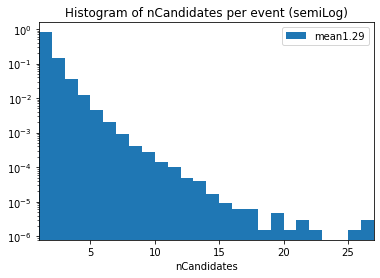

( 0.36 ) 233552 269618 1.15
0.888478797013085


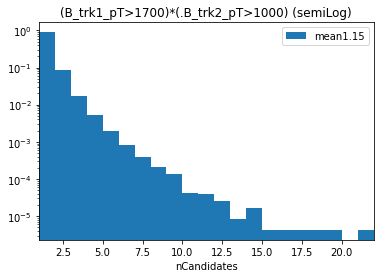

( 0.15 ) 97580 107471 1.10
0.9252715720434513


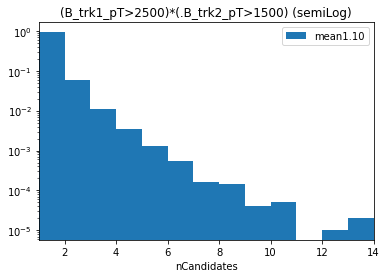

( 0.10 ) 68004 73810 1.09
0.9367537203693901


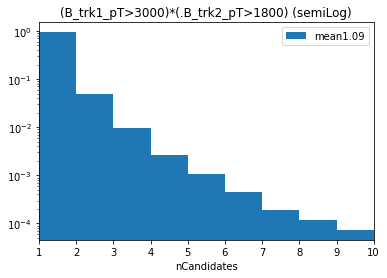

( 0.01 ) 8315 8606 1.03
0.9711365003006615


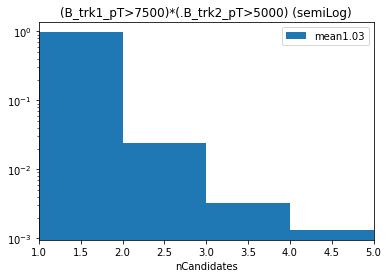

In [111]:
pdf = PdfPages('cuts.pdf')
nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof])
#print(np.mean(nCandidates))

maxCandidates = max(nCandidates)
n = plt.hist(nCandidates, density=True, bins=maxCandidates-1,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
print("(",'{:0.2f}'.format(len(nCandidates)/650000),")",len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0][0]/np.sum(n[0]))
plt.title("Histogram of nCandidates per event (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.plot([], [], ' ', label="Extra label on the legend")
plt.legend()
pdf.savefig() 
plt.show()


nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof]#[(vtx.B_trk1_pT>1700)*(vtx.B_trk2_pT>1000)]  if len(chi) != 0  ])
maxCandidates = max(nCandidates)
n = plt.hist(nCandidates, density=True, bins=maxCandidates-1,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
print("(",'{:0.2f}'.format(len(nCandidates)/650000),")",len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0][0]/np.sum(n[0]))
plt.title("(B_trk1_pT>1700)*(.B_trk2_pT>1000) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()


nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>2500)*(vtx.B_trk2_pT>1500)]  if len(chi) != 0  ])
maxCandidates = max(nCandidates)
n = plt.hist(nCandidates, density=True, bins=maxCandidates-1,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
print("(",'{:0.2f}'.format(len(nCandidates)/650000),")",len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0][0]/np.sum(n[0]))
plt.title("(B_trk1_pT>2500)*(.B_trk2_pT>1500) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()


#print(len(vtx.B_chi2_ndof),len(vtx.B_chi2_ndof[(vtx.B_trk1_pT>1000)*(vtx.B_trk2_pT>1000)  ]))
nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>3000)*(vtx.B_trk2_pT>1800)]  if len(chi) != 0  ])
maxCandidates = max(nCandidates)
n = plt.hist(nCandidates, density=True, bins=maxCandidates-1,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
print("(",'{:0.2f}'.format(len(nCandidates)/650000),")",len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0][0]/np.sum(n[0]))
plt.title("(B_trk1_pT>3000)*(.B_trk2_pT>1800) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()


nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>7500)*(vtx.B_trk2_pT>5000)]  if len(chi) != 0  ])
maxCandidates = max(nCandidates)
n = plt.hist(nCandidates, density=True, bins=maxCandidates-1,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
print("(",'{:0.2f}'.format(len(nCandidates)/650000),")",len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0][0]/np.sum(n[0]))
plt.title("(B_trk1_pT>7500)*(.B_trk2_pT>5000) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()


#print(np.sum((vtx.B_trk1_pT>1000)*(vtx.B_trk2_pT>1000)))
#print(vtx.B_chi2_ndof[(vtx.B_trk1_pT>1000)*(vtx.B_trk2_pT>1000)].count().sum())
#print(vtx.B_chi2_ndof[(vtx.B_trk1_pT>1000)*(vtx.B_trk2_pT>1000)])
pdf.close()

In [106]:
nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>2000)*(vtx.B_trk2_pT>1200)]  if len(chi) != 0  ])
print(len(nCandidates),"(",np.sum(nCandidates)('{:0.2f}'.format(len(nCandidates)/650000),")",'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print(n[0]/np.sum(n[0]))
#print(np.mean(nCandidates))

maxCandidates = max(nCandidates)
plt.hist(nCandidates, density=True, bins=maxCandidates,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
plt.title("(B_trk1_pT>2000)*(.B_trk2_pT>1200) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()

      
mins = [[]]
maxCandidates = max(nCandidates)
plt.hist(nCandidates, density=True, bins=maxCandidates,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
plt.title("(B_trk1_pT>3000)*(.B_trk2_pT>1800) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()

nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>5000)*(vtx.B_trk2_pT>2500)]  if len(chi) != 0  ])
print(len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print('{:0.2f}'.format(len(nCandidates)/650000))
#print(np.mean(nCandidates))



nCandidates = np.array([len(chi) for chi in vtx.B_chi2_ndof[(vtx.B_trk1_pT>5000)*(vtx.B_trk2_pT>2500)]  if len(chi) != 0  ])
print(len(nCandidates),np.sum(nCandidates),'{:0.2f}'.format(np.sum(nCandidates)/len(nCandidates)))
print('{:0.2f}'.format(len(nCandidates)/650000))
#print(np.mean(nCandidates))

maxCandidates = max(nCandidates)
plt.hist(nCandidates, density=True, bins=maxCandidates,label="mean"+'{:0.2f}'.format(np.mean(nCandidates)))#bins='auto'  # arguments are passed to np.histogram
plt.title("(B_trk1_pT>5000)*(.B_trk2_pT>2500) (semiLog)")
plt.xlim([1, maxCandidates])
plt.yscale('log')
plt.xlabel('nCandidates')
plt.legend()
pdf.savefig() 
plt.show()

SyntaxError: invalid syntax (<ipython-input-106-038c67d3e0e0>, line 3)

## bin

In [13]:
x = X["B_trk1_pT"]
unpackedLists = {
    "all candidates" : np.array(chain.from_iterable(x)),
    "only multiple candidates" : np.array(chain.from_iterable(x[multipleCandidates])),
    "only single candidate" : np.array(chain.from_iterable(x[singleCandidate]))}



In [62]:
for u in unpackedLists:
    print(np.sum(unpackedLists[u]>1000))

TypeError: '>' not supported between instances of 'list' and 'int'

In [3]:
X = {#"B_mass" : masses, 
     "B_trk1_pT" : vtx.B_trk1_pT, #np.array(tr1Pts)
     "B_trk2_pT" : vtx.B_trk2_pT, #np.array(tr1Pts)
     "B_Kpi_pT" : vtx.Kpi_pT} #np.array(tr1Pts)

Xlims = {#"Chi2/ndf" : [[0,2.5]], 
     "B_trk1_pT" : [0,10000],
     "B_trk2_pT" : [0,10000],
     "B_Kpi_pT" : [0,10000]}
plt.close()
for xName in X:
    x = X[xName]
    unpackedLists = {
        xName : list(chain.from_iterable(x)),
        #"only multiple candidates" : list(chain.from_iterable(x[multipleCandidates])),
        #"only single candidate" : list(chain.from_iterable(x[singleCandidate]))
    }
    print('\033[1m' + xName + '\033[0m')
    
    for yName in unpackedLists:
        y = unpackedLists[yName]
        print(yName, len(y), np.mean(y), np.std(y))
        plt.hist(y, bins=1000, label=yName, density=True,histtype='step')#bins='auto'  # arguments are passed to np.histogram # log=True, 
        #fig, ax = plt.subplots()

    plt.title("Histogram of " + xName )
    plt.xlabel(xName)
    plt.xlim(Xlims[xName])
    plt.legend()
plt.show()
    #pdf.savefig()
    #plt.yscale('log')
    #plt.title("Histogram of " + xName +" (semiLog)")
    #pdf.savefig()
#    if xName == "Lifetime":
#        plt.title(xName +  " zoom")
#        plt.xlim([-1,2])
#        pdf.savefig()
#        plt.yscale('linear')
#        pdf.savefig()

    

NameError: name 'vtx' is not defined

In [58]:
#Kpi_pT = [np.array(i) for i in Kpi_pT]
Kpi_pT = uproot.interpretation.jagged.AsJagged(Kpi_pT)
print (Kpi_pT[:10])
print(vtx.B_trk2_pT[:10])

TypeError: AsJagged content can only be Numerical

In [10]:
nCandidates = {}
multipleCandidates ={}
singleCandidates = {}
cuts = {}  

a_taus = {}
m_taus = {}
s_taus = {}

#############################pT cuts##########################################
pTcuts = [[10000],[25000],[50000],[75000],[100000]] #[2000],[2500],[3000],[3500],[4000],[4500]]
    
for i,c in enumerate(pTcuts):
    
    newCuts = vtx.Kpi_pT>c[0]
    namePtCut = "pT(Kpi) > " + str(c[0]) 
    cuts[namePtCut] = newCuts
    
print("cuts prepared",datetime.now().strftime("%d/%m/%Y - %H:%M:%S"))
for c in cuts.keys():
    print(c)



cuts prepared 09/11/2021 - 15:45:28
pT(Kpi) > 10000
pT(Kpi) > 25000
pT(Kpi) > 50000
pT(Kpi) > 75000
pT(Kpi) > 100000


In [ ]:
for i,c in enumerate(cuts):
    nCandidates[c] = np.array([len(pT) for pT in vtx.Kpi_pT[cuts[c]]])
    a_taus[c] = list(chain.from_iterable(vtx.B_tau_MinA0[cuts[c]]))
    
    multipleCandidates[c] = np.array(nCandidates[c]>1)
    singleCandidates[c] = np.array(nCandidates[c]==1)
    #print(a_taus[c])
    #print(multipleCandidates[c][:10])
    m_taus[c] = list(chain.from_iterable(vtx.B_tau_MinA0[cuts[c]*multipleCandidates[c]]))
    s_taus[c] = list(chain.from_iterable(vtx.B_tau_MinA0[cuts[c]*singleCandidates[c]]))
    #print()
#     print(m_taus[c][:10])
    #print(np.mean(m_taus[c][:3]))
#     print()
    #print(s_taus[c])
    #print(np.mean(s_taus[c]))
    
    print(c, len(nCandidates[c]),np.sum(multipleCandidates[c]),np.sum(singleCandidates[c]),np.mean(a_taus[c]),np.mean(m_taus[c]),np.mean(s_taus[c]))

In [82]:
print ("cut", "multipleCand evts", 'mean(nCand)','mean(tau_all)','mean(tau_multiple)','mean(tau_single)', sep=' & ', end=' \\\\ \n')
for i,c in enumerate(cuts):
    print (c, '{:2.1%}'.format(np.sum(multipleCandidates[c])/np.sum(multipleCandidates[c]+singleCandidates[c])), '{:0.2f}'.format(np.mean(nCandidates[c])),'{:0.3f}'.format(np.mean(a_taus[c])),'{:0.3f}'.format(np.mean(m_taus[c])),'{:0.3f}'.format(np.mean(s_taus[c])), sep=' & ', end=' \\\\ \n')

cut & multipleCand evts & mean(nCand) & mean(tau_all) & mean(tau_multiple) & mean(tau_single) \\ 
pT(Kpi) > 2000 & 39.9% & 1.71 & 0.178 & 0.052 & 0.480 \\ 
pT(Kpi) > 2500 & 36.7% & 1.31 & 0.209 & 0.054 & 0.529 \\ 
pT(Kpi) > 3000 & 34.0% & 1.00 & 0.240 & 0.056 & 0.574 \\ 
pT(Kpi) > 3500 & 31.7% & 0.78 & 0.270 & 0.057 & 0.615 \\ 
pT(Kpi) > 4000 & 29.9% & 0.63 & 0.299 & 0.058 & 0.651 \\ 
pT(Kpi) > 4500 & 28.4% & 0.52 & 0.325 & 0.060 & 0.680 \\ 


In [13]:


t = list(chain.from_iterable(taus))
t_multiple = list(chain.from_iterable(taus[multipleCandidates]))
t_single = list(chain.from_iterable(taus[singleCandidate]))

print(len(t_multiple),len(t_single),len(t))
#len(taus)

chi = list(chain.from_iterable(chis))
chi_multiple = list(chain.from_iterable(chis[multipleCandidates]))
chi_single = list(chain.from_iterable(chis[singleCandidate]))

6464540 4381055 10845595


In [32]:
plt.close()
#plt.figure(figsize=(3, 3))
plt.hist(t_single, bins=100) #bins='auto'  # arguments are passed to np.histogram
plt.title("Lifetime for events with single candidates (semiLog)")
plt.xlim([-2, 20])
plt.yscale('log') 
plt.xlabel('tau')
pdf.savefig()  # saves the current figure into a pdf page
#plt.close()
#fig, ax = plt.subplots()
plt.show()
pdf.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
plt.hist([t,t_single,t_multiple], bins=100, density=True,histtype='step')#bins='auto'  # arguments are passed to np.histogram
#fig, ax = plt.subplots()
plt.title("Lifetime for events with single candidates (semiLog)")
plt.xlim([-2, 20])
#plt.yscale('log')
plt.xlabel('tau')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

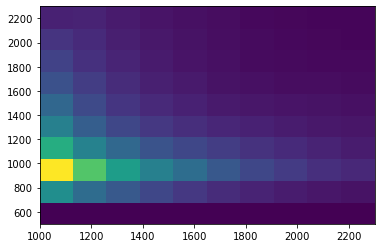

In [40]:
plt.hist2d(list(chain.from_iterable(X["B_trk1_pT"])),list(chain.from_iterable(X["B_trk2_pT"])) , bins=10,  range=[[1000,2300],[500,2300]], )#density=True,histtype='step')
plt.show()

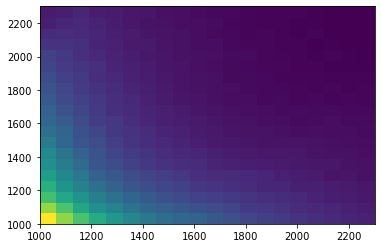

In [38]:
plt.hist2d(list(chain.from_iterable(X["B_trk1_pT"])),list(chain.from_iterable(X["B_trk2_pT"])) , bins=20,  range=[[1000,2300],[1000,2300]], )#density=True,histtype='step')
plt.show()

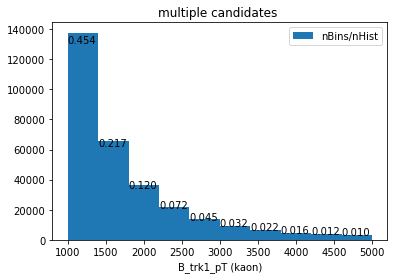

[0.45417517 0.21696737 0.11982849 0.07237307 0.04539903 0.03151262
 0.02193373 0.01609464 0.01205778 0.0096581 ]


In [47]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk1_pT[multipleCandidates]))),range=[1000,5000], bins=your_bins, label="nBin/nHist")

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))

plt.title("multiple candidates ")
plt.xlabel('B_trk1_pT (kaon)')    
plt.legend()    
plt.show()

n = arr
print(n[0]/np.sum(n[0]))

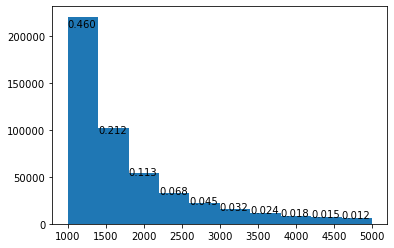

[0.45967406 0.21241872 0.11325442 0.06816647 0.04517548 0.03221282
 0.02380168 0.01834153 0.01480077 0.01215405]


In [34]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk1_pT[singleCandidate]))),range=[1000,5000], bins=your_bins, label="multipleCandidates")

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))
    
plt.show()
n = arr
print(n[0]/np.sum(n[0]))

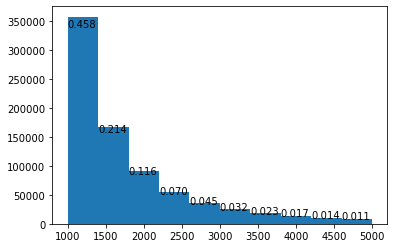

[0.45754588 0.21417914 0.11579871 0.06979451 0.045262   0.03194183
 0.02307875 0.01747194 0.01373918 0.01118807]


In [33]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk1_pT))),range=[1000,5000], bins=your_bins)

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))
    
plt.show()
n = arr
print(n[0]/np.sum(n[0]))

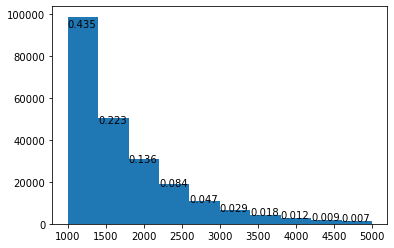

[0.43474622 0.22288342 0.13628655 0.08404653 0.04703804 0.02892582
 0.01839853 0.0123993  0.00872576 0.00654982]


In [42]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk2_pT[multipleCandidates]))),range=[1000,5000], bins=your_bins, label="multipleCandidates")

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))
    
plt.show()
n = arr
print(n[0]/np.sum(n[0]))

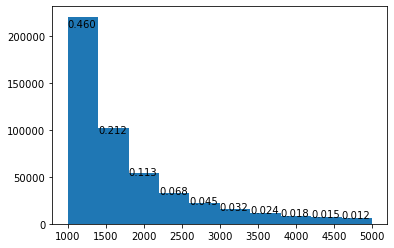

[0.45967406 0.21241872 0.11325442 0.06816647 0.04517548 0.03221282
 0.02380168 0.01834153 0.01480077 0.01215405]


In [43]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk1_pT[singleCandidate]))),range=[1000,5000], bins=your_bins, label="singleCandidate")

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))
    
plt.show()
n = arr
print(n[0]/np.sum(n[0]))

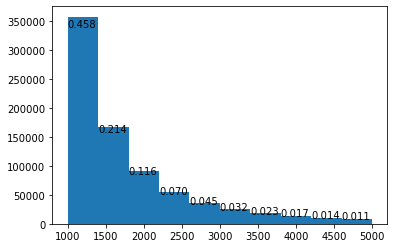

[0.45754588 0.21417914 0.11579871 0.06979451 0.045262   0.03194183
 0.02307875 0.01747194 0.01373918 0.01118807]


In [44]:
your_bins=10
arr = plt.hist(list(chain.from_iterable(np.array(vtx.B_trk1_pT))),range=[1000,5000], bins=your_bins, label="allCandidates")

for i in range(your_bins):
    plt.text(arr[1][i],0.95*arr[0][i],'{:0.3f}'.format(arr[0][i]/np.sum(arr[0])))
    
plt.show()
n = arr
print(n[0]/np.sum(n[0]))

In [16]:
a = np.array([1,2,3,4,])
l = (a<2)
g = (a>2) 

print(l,g)
print(l&g)
print(l|g)

[ True False False False] [False False  True  True]
[False False False False]
[ True False  True  True]


In [16]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Times", 'B', size = 15)
  
# create a cell
pdf.cell(200, 10, txt = name + ' 2017 (2.5 M subset) ', 
         ln = 1, align = 'C')

pdf.set_font("Times", size = 12)
pdf.set_text_color(200,200,200);

# add another cell
pdf.cell(200, 8, txt = file_name,
         ln = 2, align = 'C')
pdf.cell(200, 6, txt = "Marek Biros",
         ln = 3, align = 'C')
  
# save the pdf with name .pdf
pdf.set_text_color(0,0,0);

pdf.set_font("Times", 'BU', size = 12)
line = 5
pdf.cell(200, 8, txt = "cutFlow",
         ln = line, align = 'C')
line += 2

print('\033[1m' + name + ' 2017  \033[0m')


pdf.set_font("Times",'B', size = 10)
pdf.cell(200, 6, txt = "no selection", 
         ln = line, align = 'L')
line += 1
pdf.set_font("Times", size = 10)
pdf.cell(200, 5, txt = "nEvents: "+str(nEvents), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/len(vtx.evt_number))+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEvents), 
         ln = line, align = 'L')
line += 2

pdf.line(10, 65, 200, 65)
pdf.cell(200, 5, txt = "", 
         ln = line, align = 'L')

pdf.set_font("Times","B", size = 10)
pdf.cell(200, 5, txt = "new default after baseline cuts", 
         ln = line, align = 'L')
line += 1
pdf.set_font("Times", size = 10)
pdf.cell(200, 5, txt = "nEvents: "+str(nEvents)+'; nEventsAfterCut/nEvents: 100%', 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = "nEventsWithMultipleCandidates: "+str(np.sum(multipleCandidates))+"; nEventsWithSingleCandidate: "+str(np.sum(singleCandidate))+"; nCandidates: "+str(np.sum(nCandidates)), 
         ln = line, align = 'L')
line += 1
pdf.cell(200, 5, txt = '{:2.2%}'.format(np.sum(multipleCandidates)/nEvents)+' events have multiple candidates; mean(nCandidatesPerEvent): {:0.2f}'.format(np.sum(nCandidates)/nEvents), 
         ln = line, align = 'L')
line += 2

  
pdf.output("test.pdf")

Bplus 2017  


''